**Sales Prediction**

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Load

In [ ]:
data = pd.read_csv('advertising.csv')

Viewing dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.shape

(200, 4)

In [ ]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


**Data Cleaning**

Checking null values

In [ ]:
data.isna().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


Checking duplicates

In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [ ]:
data.duplicated().sum()

0

**Exploratory Data Analysis**

In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

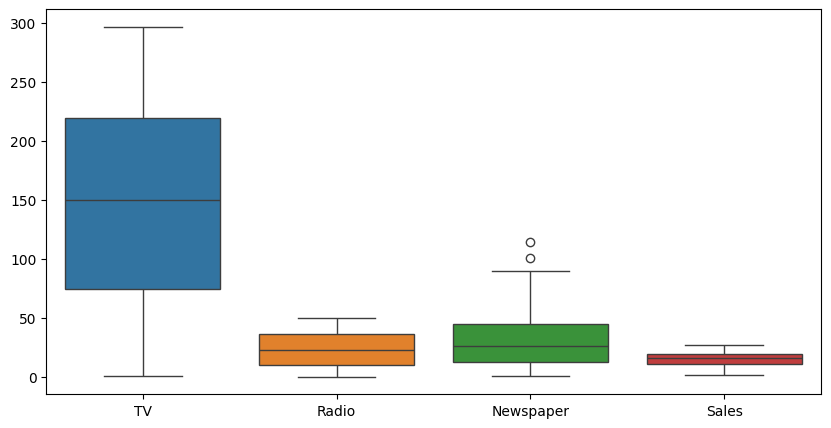

In [ ]:
# To detect outliers
fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=data, ax=ax)

Histogram for TV advertising

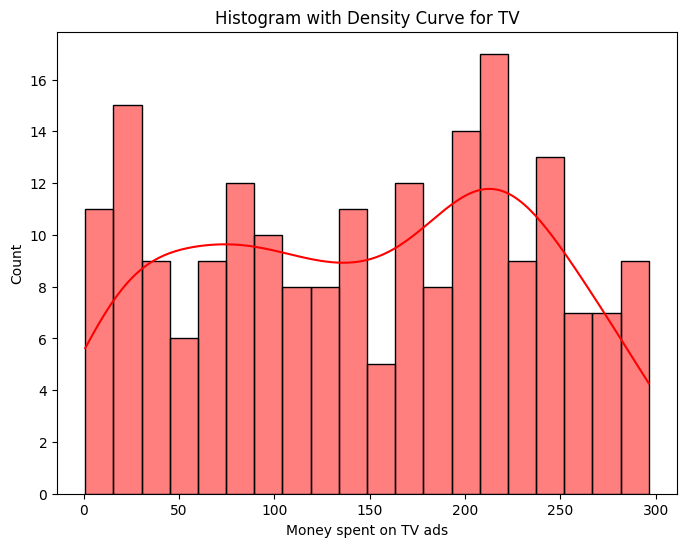

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=data, x='TV', bins=20,color='red', kde=True, ax=ax)
ax.set_xlabel('Money spent on TV ads')
ax.set_title('Histogram with Density Curve for TV')
plt.show()

Histogram for radio advertising

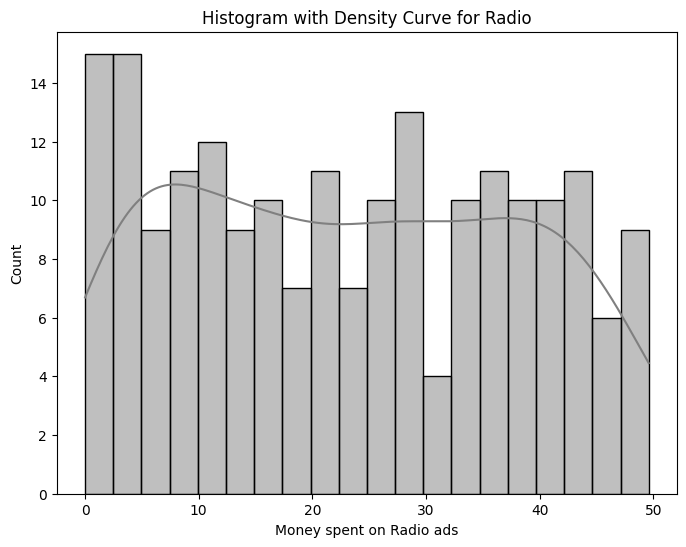

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
sns.histplot(data=data, x='Radio', bins=20,color='grey', kde=True, ax=ax)
ax.set_xlabel('Money spent on Radio ads')
ax.set_title('Histogram with Density Curve for Radio')
plt.show()

Histogram for Sales advertising

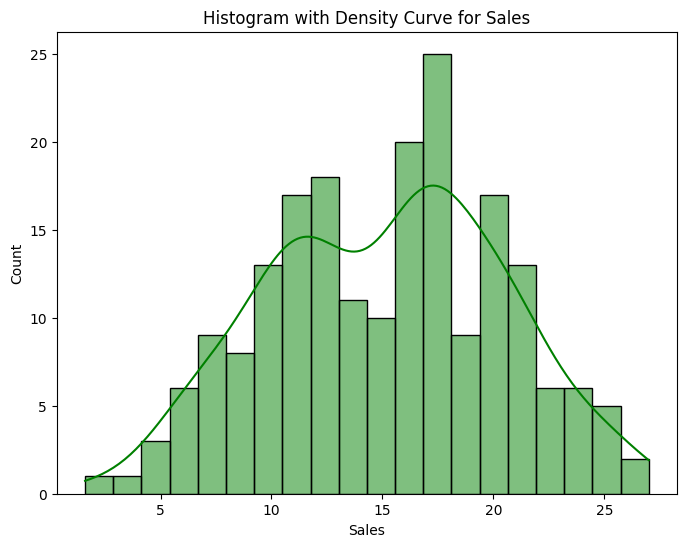

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
sns.histplot(data=data, x='Sales', bins=20,color='green', kde=True, ax=ax)
ax.set_xlabel('Sales')
ax.set_title('Histogram with Density Curve for Sales')
plt.show()

Histogram for Newspaper sales

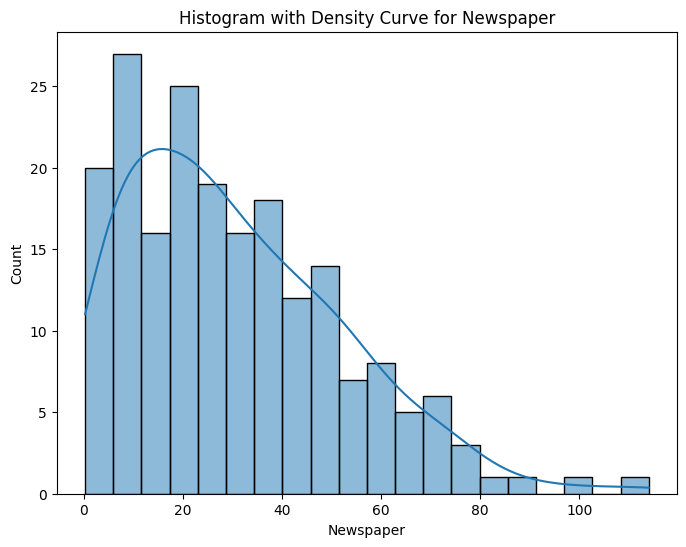

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
sns.histplot(data=data, x='Newspaper', bins=20, kde=True, ax=ax)
ax.set_xlabel('Newspaper')
ax.set_title('Histogram with Density Curve for Newspaper')
plt.show()

Relationship between variables

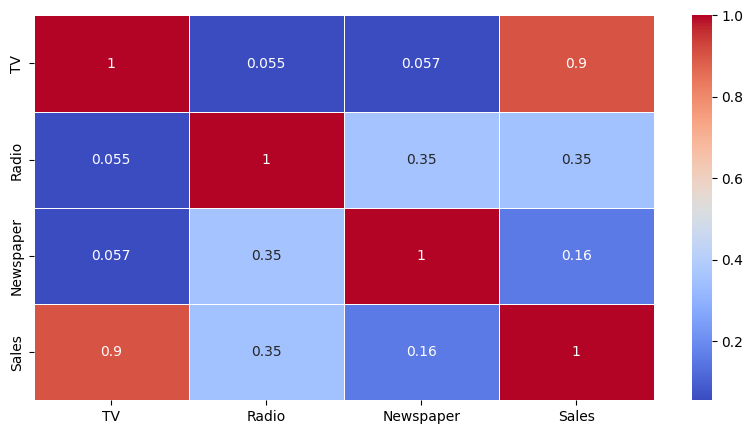

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', ax=ax, linewidth=0.5)
plt.show()

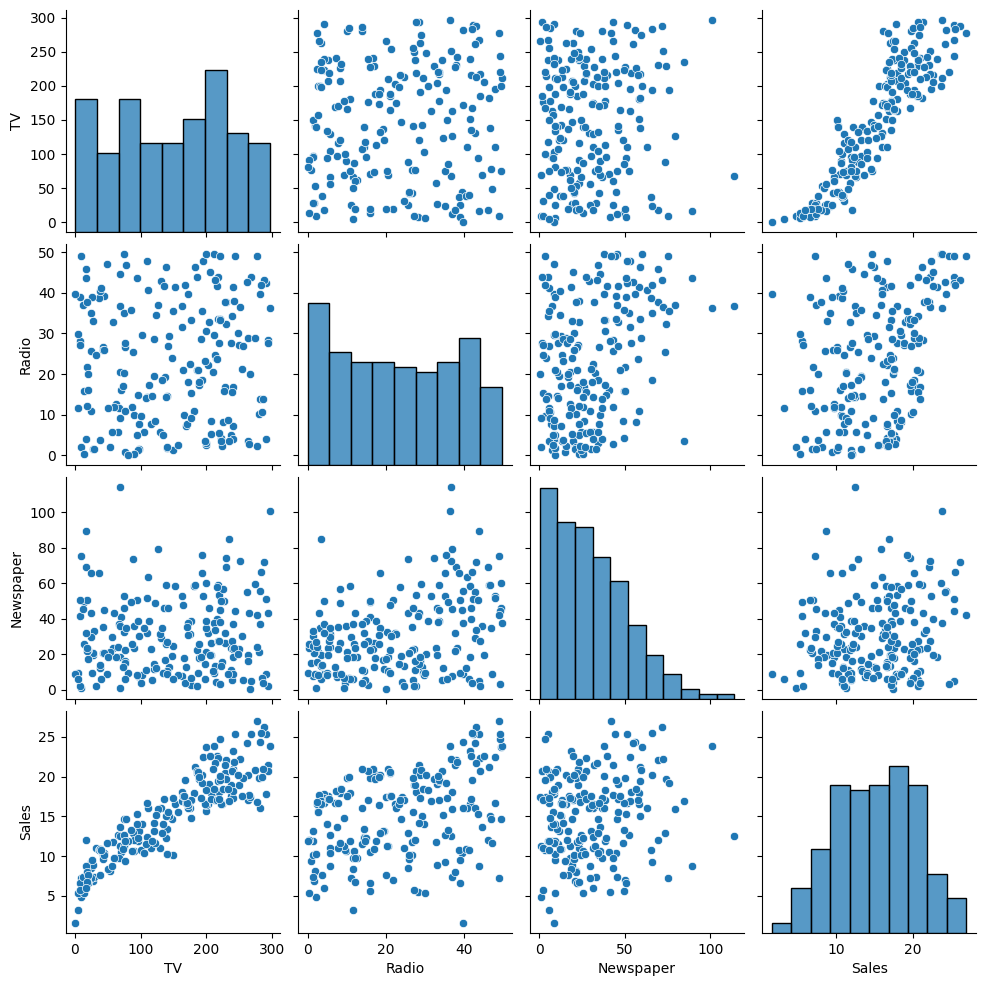

In [ ]:
sns.pairplot(data)

Scatter Plot for TV Advertising V/s Sales

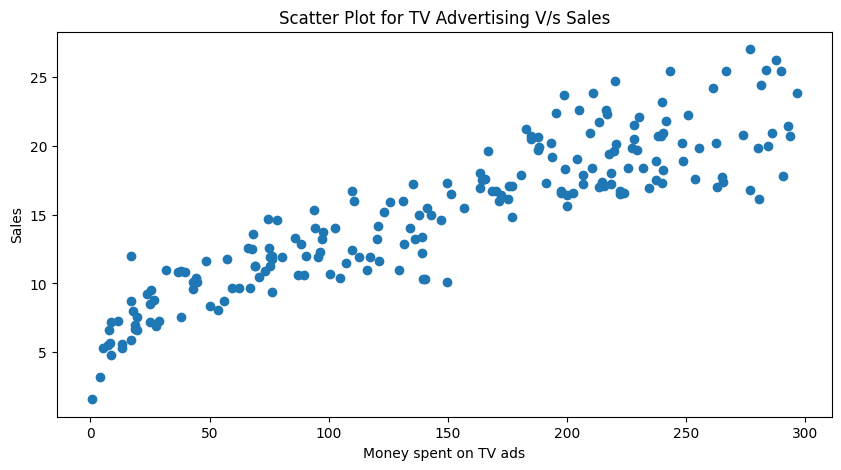

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter( x='TV', y='Sales', data=data,marker='o')
ax.set_xlabel('Money spent on TV ads')
ax.set_ylabel('Sales')
ax.set_title('Scatter Plot for TV Advertising V/s Sales')
plt.show()

**DATA SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Sales', axis=1)
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = X_train.join(y_train)
train_data

,TV,Radio,Newspaper,Sales
79,116.0,7.7,23.1,11.0
197,177.0,9.3,6.4,14.8
38,43.1,26.7,35.1,10.1
24,62.3,12.6,18.3,9.7
122,224.0,2.4,15.6,16.6
...,...,...,...,...
106,25.0,11.0,29.7,7.2
14,204.1,32.9,46.0,19.0
92,217.7,33.5,59.0,19.4
179,165.6,10.0,17.6,17.6


**MODEL SELECTION**

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, y_train = train_data.drop('Sales', axis=1), train_data['Sales']
X_test = X_test

fitted_model = LinearRegression()
fitted_model.fit(X_train, y_train)
y_pred = fitted_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'Accuracy: {r2}')

MSE: 2.9077569102710896
MAE: 1.2748262109549338
Accuracy: 0.9059011844150826


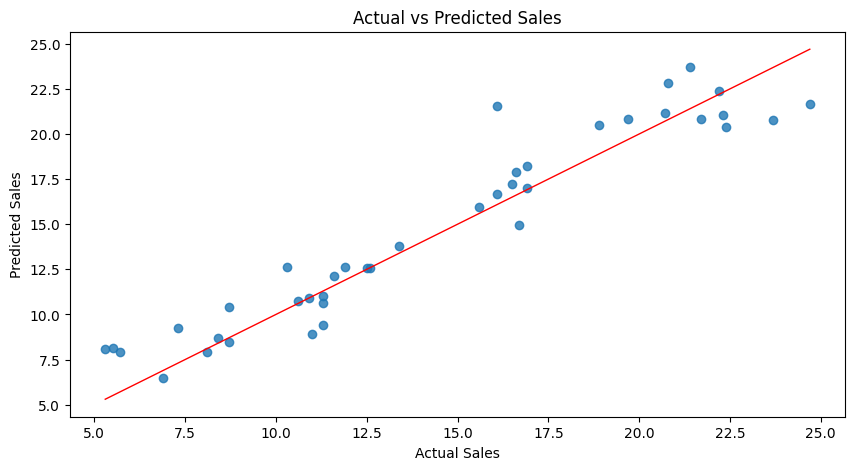

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.8)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linewidth=1)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

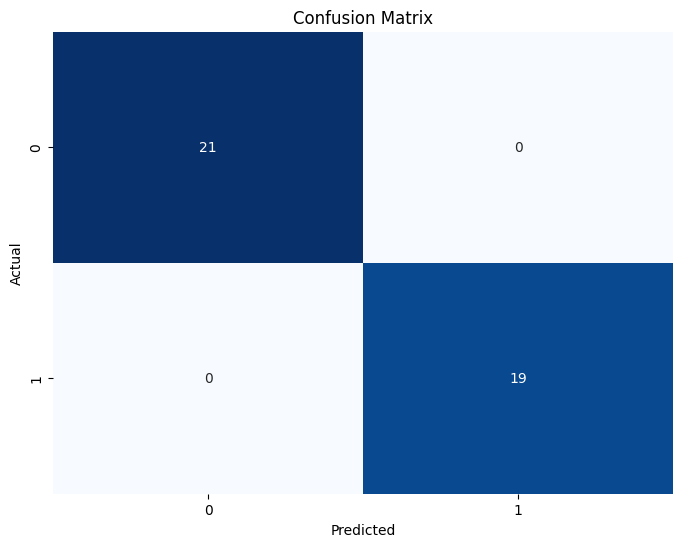

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
threshold = np.mean(y_test)
y_pred_class = np.where(y_pred > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)
cm = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**KNN**

MSE: 3.115529999999999
MAE: 1.3315
Accuracy: 0.8991773755626823


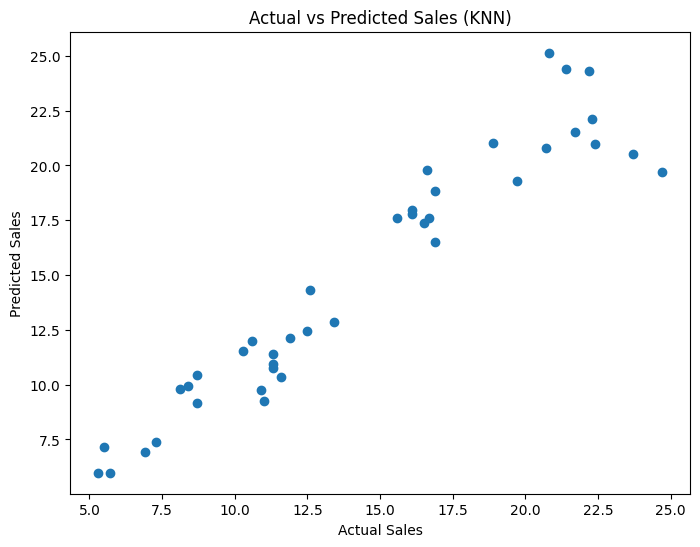

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'MSE: {mse_knn}')
print(f'MAE: {mae_knn}')
print(f'Accuracy: {r2_knn}')

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_knn)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (KNN)")
plt.show()

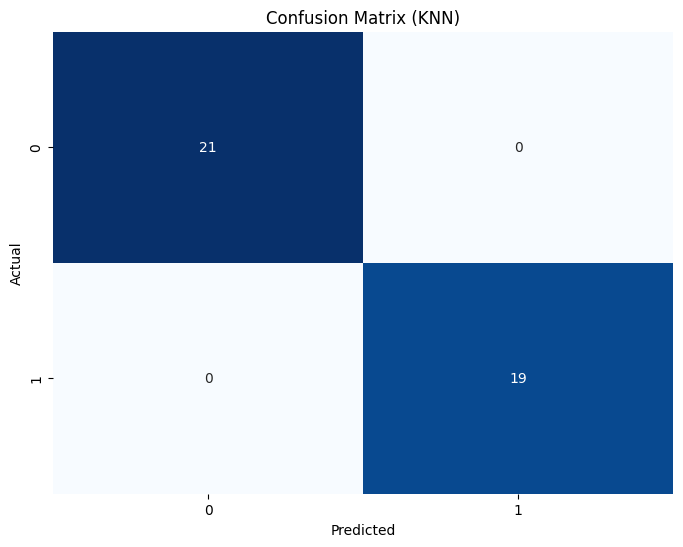

In [ ]:
threshold = np.mean(y_test)
y_pred_class = np.where(y_pred_knn >= threshold, 1, 0)
y_test_class = np.where(y_test >= threshold, 1, 0)

cm_knn = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN)')
plt.show()

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, y_train = train_data.drop('Sales', axis=1), train_data['Sales']
X_test = X_test

fitted_model = DecisionTreeRegressor()
fitted_model.fit(X_train, y_train)
y_pred = fitted_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred =fitted_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'Accuracy of Decision Tree: {r2}')

MSE: 3.0284999999999997
MAE: 1.2550000000000001
Accuracy of Decision Tree: 0.9019937801566934


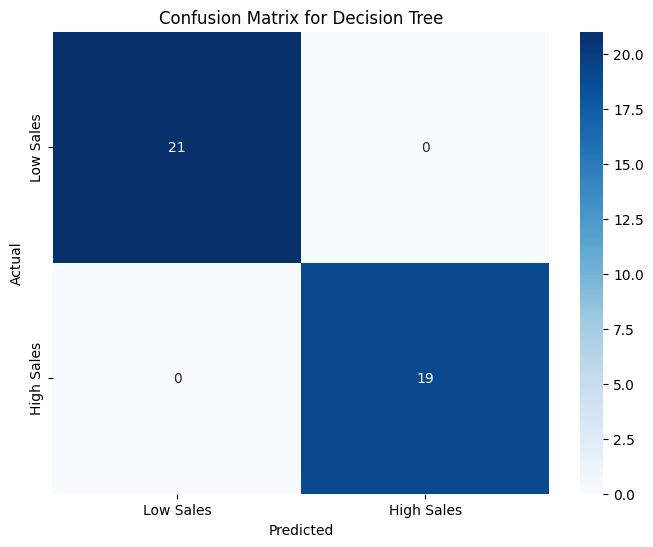

In [ ]:
from sklearn.metrics import confusion_matrix
threshold = np.mean(y_test)
y_pred_class = np.where(y_pred > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)
cm = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Sales', 'High Sales'],
            yticklabels=['Low Sales', 'High Sales'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

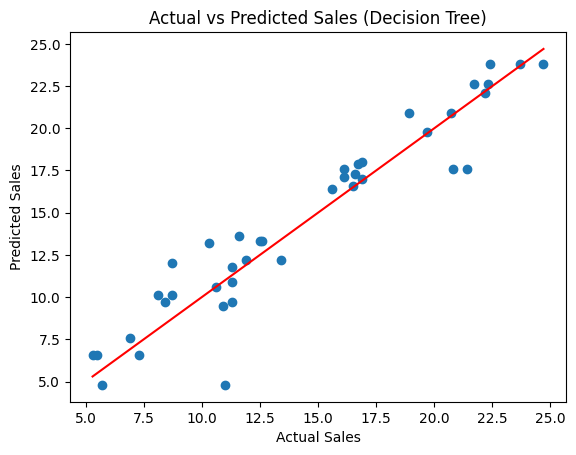

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Decision Tree)")
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, y_train = train_data.drop('Sales', axis=1), train_data['Sales']
X_test = X_test

fitted_model = RandomForestRegressor()
fitted_model.fit(X_train, y_train)
y_pred = fitted_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'Accuracy of Random Forest: {r2}')

MSE: 1.6395804250000023
MAE: 0.9730749999999997
Accuracy of Random Forest: 0.9469410336525236


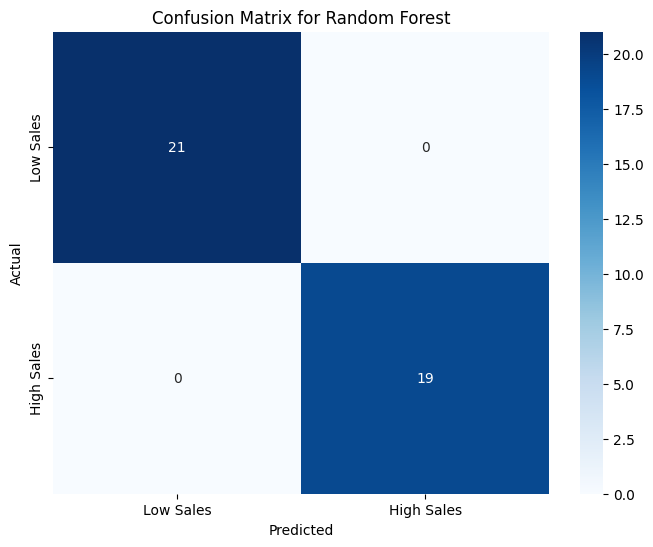

In [ ]:
from sklearn.metrics import confusion_matrix
threshold = np.mean(y_test)
y_pred_class = np.where(y_pred > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)

cm = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels = ['Low Sales', 'High Sales'],
            yticklabels = ['Low Sales', 'High Sales'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()


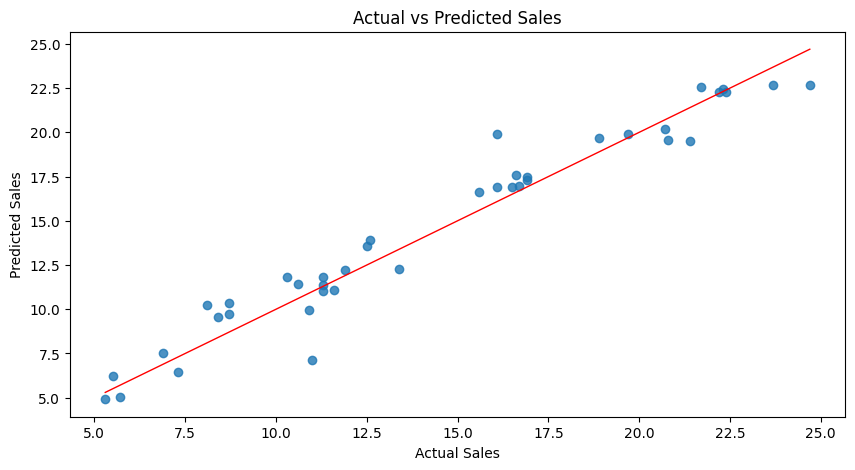

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.8)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linewidth=1)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

Comparing Models

Accuracy of Linear Regression: 1.0
Accuracy of KNN: 1.0
Accuracy of Decision Tree: 1.0
Accuracy of Random Forest: 1.0


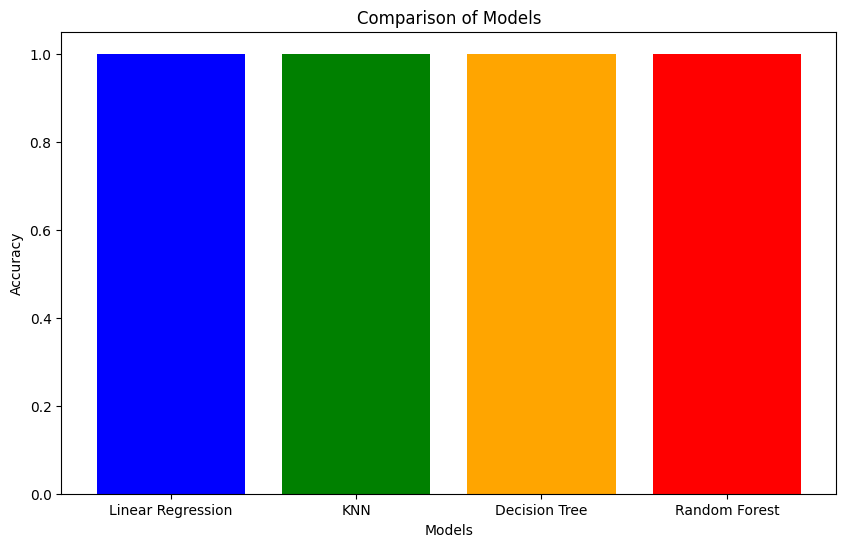

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_class, y_pred_class)
accuracy1 = accuracy_score(y_test_class, y_pred_class)
accuracy2 = accuracy_score(y_test_class, y_pred_class)
accuracy3 = accuracy_score(y_test_class, y_pred_class)

models = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracies = [accuracy, accuracy1, accuracy2, accuracy3]

print(f'Accuracy of Linear Regression: {accuracy}')
print(f'Accuracy of KNN: {accuracy1}')
print(f'Accuracy of Decision Tree: {accuracy2}')
print(f'Accuracy of Random Forest: {accuracy3}')

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Models')
plt.show()

               Model      MSE       MAE  Accuracy
0  Linear Regression  1.63958  0.973075  0.946941
1                KNN  3.11553  1.331500  0.899177
2      Decision Tree  1.63958  0.973075  0.946941
3      Random Forest  1.63958  0.973075  0.946941


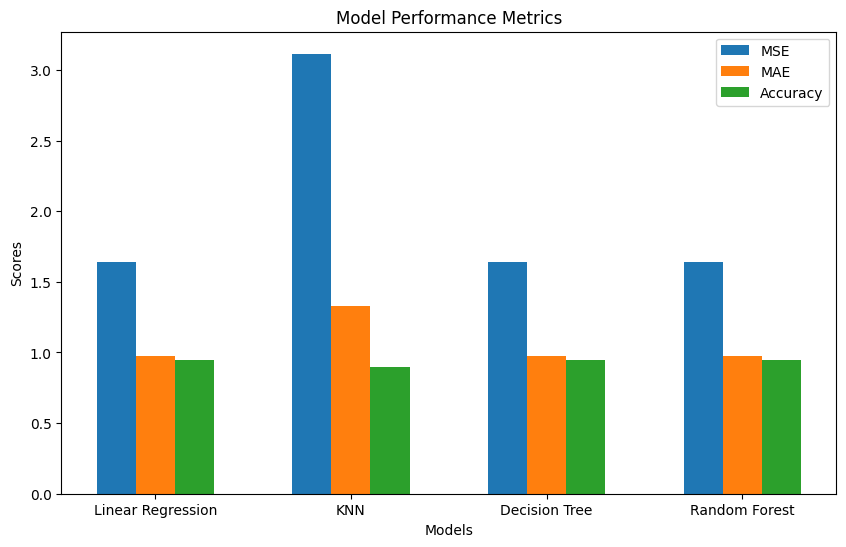

In [ ]:
from operator import index
model_names = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest']

mse_values = [mse, mse_knn, mse, mse]
mae_values = [mae, mae_knn, mae, mae]
r2_values = [r2, r2_knn, r2, r2]

results_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_values,
    'MAE': mae_values,
    'Accuracy': r2_values
})

print(results_df)

plt.figure(figsize=(10, 6))
bar_width = 0.2

index = np.arange(len(model_names))

plt.bar(index, mse_values, bar_width, label='MSE')
plt.bar(index + bar_width, mae_values, bar_width, label='MAE')
plt.bar(index + 2 * bar_width, r2_values, bar_width, label='Accuracy')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Metrics')
plt.xticks(index + bar_width, model_names)
plt.legend()
plt.show()


In [ ]:
X.tail(10)

,TV,Radio,Newspaper
190,39.5,41.1,5.8
191,75.5,10.8,6.0
192,17.2,4.1,31.6
193,166.8,42.0,3.6
194,149.7,35.6,6.0
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2
199,232.1,8.6,8.7


In [ ]:
y.tail(10)

,Sales
190,10.8
191,11.9
192,5.9
193,19.6
194,17.3
195,7.6
196,14.0
197,14.8
198,25.5
199,18.4


In [ ]:
data = {'TV': [100], 'Radio': [20], 'Newspaper': [30]}
trial_data = pd.DataFrame(data)
trial_data

,TV,Radio,Newspaper
0,100,20,30


In [ ]:
predict_rating = fitted_model.predict(trial_data)
print(f'Predicted Sales:' ,predict_rating[0])

Predicted Sales: 12.637000000000002
